In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os


data = pd.read_csv("/content/mgcu Temperature data of 25 years.csv")
data

,DATE,TEMPERATURE
0,10-08-1998,30.46
1,11-08-1998,29.19
2,12-08-1998,30.83
3,13-08-1998,28.33
4,14-08-1998,27.62
...,...,...
9126,05-08-2023,31.28
9127,06-08-2023,31.93
9128,07-08-2023,28.81
9129,08-08-2023,29.76


In [ ]:
df = data.set_index(pd.DatetimeIndex(data['DATE']))
df

<ipython-input-47-c766c93a47d6>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = data.set_index(pd.DatetimeIndex(data['DATE']))


,DATE,TEMPERATURE
DATE,,
1998-10-08,10-08-1998,30.46
1998-11-08,11-08-1998,29.19
1998-12-08,12-08-1998,30.83
1998-08-13,13-08-1998,28.33
1998-08-14,14-08-1998,27.62
...,...,...
2023-05-08,05-08-2023,31.28
2023-06-08,06-08-2023,31.93
2023-07-08,07-08-2023,28.81


In [ ]:
#convert the 'Date column to a datatime type
data['DATE'] = pd.to_datetime(data['DATE'])

#Set the 'Date column as the index
data.set_index('DATE', inplace=True)
data

<ipython-input-48-45805add5a53>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['DATE'] = pd.to_datetime(data['DATE'])


,TEMPERATURE
DATE,
1998-10-08,30.46
1998-11-08,29.19
1998-12-08,30.83
1998-08-13,28.33
1998-08-14,27.62
...,...
2023-05-08,31.28
2023-06-08,31.93
2023-07-08,28.81


In [ ]:
df1=df[['TEMPERATURE']]
df1

,TEMPERATURE
DATE,
1998-10-08,30.46
1998-11-08,29.19
1998-12-08,30.83
1998-08-13,28.33
1998-08-14,27.62
...,...
2023-05-08,31.28
2023-06-08,31.93
2023-07-08,28.81


In [ ]:
! pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['TEMPERATURE'],model= 'additive',period=1000)
trend = decomposition.trend
seasonality=decomposition.seasonal
residuals = decomposition.resid

Text(0.5, 1.0, 'TEMPERATURE')

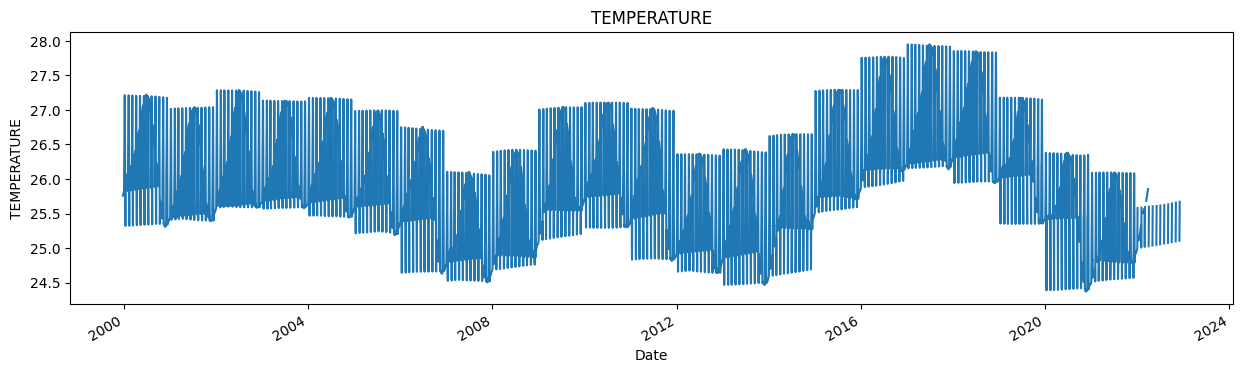

In [ ]:
plt.figure(figsize=(15, 4))
trend.plot()
plt.xlabel('Date')
plt.ylabel('TEMPERATURE')
plt.title('TEMPERATURE')

Text(0.5, 1.0, 'TEMPERATURE')

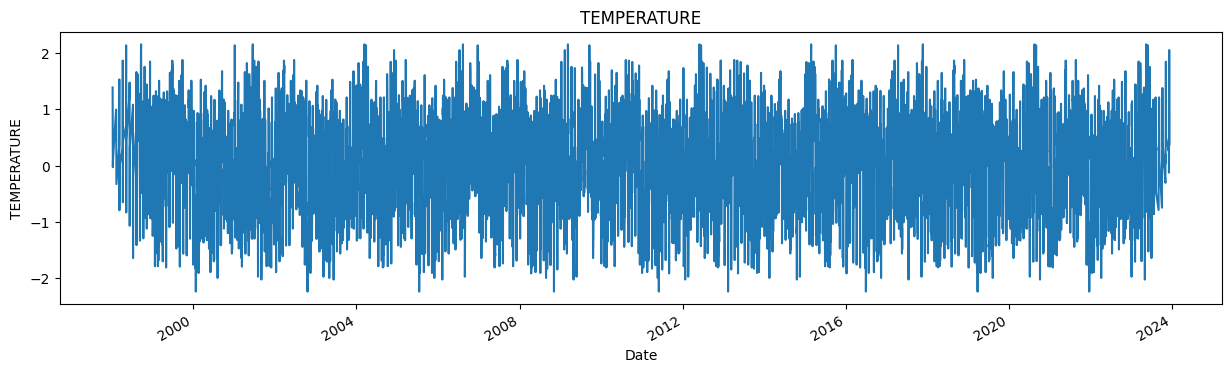

In [ ]:
plt.figure(figsize=(15, 4))
seasonality.plot()
plt.xlabel('Date')
plt.ylabel('TEMPERATURE')
plt.title('TEMPERATURE')

Text(0.5, 1.0, 'TEMPERATURE')

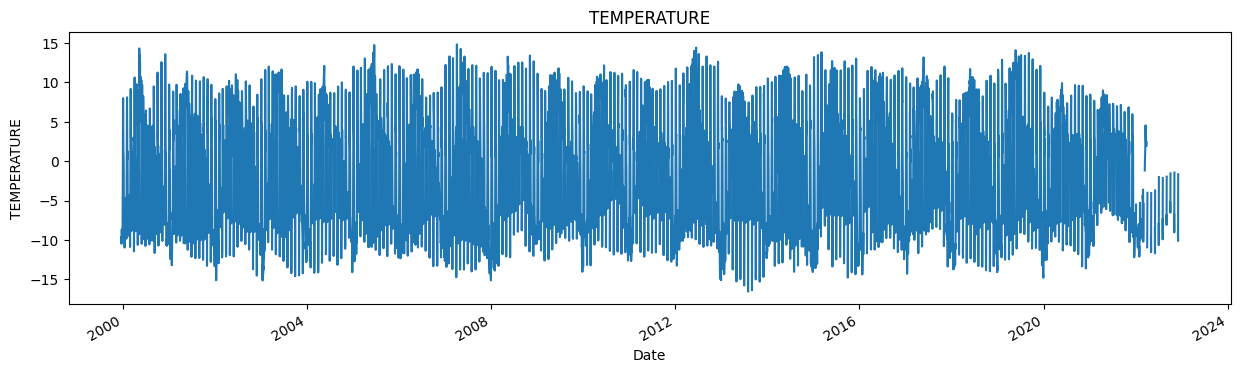

In [ ]:
plt.figure(figsize=(15, 4))
residuals.plot()
plt.xlabel('Date')
plt.ylabel('TEMPERATURE')
plt.title('TEMPERATURE')

In [ ]:
len(data)

9131

In [ ]:
train = data.iloc[:9132]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
data.head(),data.tail()

(            TEMPERATURE
 DATE                   
 1998-10-08        30.46
 1998-11-08        29.19
 1998-12-08        30.83
 1998-08-13        28.33
 1998-08-14        27.62,
             TEMPERATURE
 DATE                   
 2023-05-08        31.28
 2023-06-08        31.93
 2023-07-08        28.81
 2023-08-08        29.76
 2023-09-08        29.72)

In [ ]:
scaler.fit(train)
scaled_train = scaler.transform(train)
# scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.63805868],
       [0.60323554],
       [0.648204  ],
       [0.57965451],
       [0.56018645],
       [0.5804771 ],
       [0.59171922],
       [0.5675898 ],
       [0.56238004],
       [0.60433233]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 30
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# print(list(generator))

In [ ]:
print(len(list(generator)))

9101


In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.63805868 0.60323554 0.648204   0.57965451 0.56018645 0.5804771
 0.59171922 0.5675898  0.56238004 0.60433233 0.56238004 0.57005758
 0.59583219 0.57773512 0.57773512 0.60433233 0.58431588 0.55579929
 0.59802577 0.60515492 0.60570332 0.60159035 0.5541541  0.57746093
 0.55799287 0.56621881 0.59281601 0.54976693 0.55333151 0.56100905]
Predict this y: 
 [[0.55799287]]


In [ ]:
print(len(scaled_train),len(generator))

9131 9101


In [ ]:
X.shape

(1, 30, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator, epochs=15)

Epoch 1/15
9101/9101 [==============================] - 169s 18ms/step - loss: 0.0021
Epoch 2/15
9101/9101 [==============================] - 149s 16ms/step - loss: 0.0011
Epoch 3/15
9101/9101 [==============================] - 147s 16ms/step - loss: 0.0011
Epoch 4/15
9101/9101 [==============================] - 146s 16ms/step - loss: 0.0011
Epoch 5/15
9101/9101 [==============================] - 147s 16ms/step - loss: 0.0010
Epoch 6/15
9101/9101 [==============================] - 145s 16ms/step - loss: 0.0010
Epoch 7/15
9101/9101 [==============================] - 148s 16ms/step - loss: 0.0010
Epoch 8/15
9101/9101 [==============================] - 151s 17ms/step - loss: 0.0010
Epoch 9/15
9101/9101 [==============================] - 150s 17ms/step - loss: 0.0010
Epoch 10/15
9101/9101 [==============================] - 148s 16ms/step - loss: 0.0010
Epoch 11/15
9101/9101 [==============================] - 148s 16ms/step - loss: 9.8878e-04
Epoch 12/15
9101/9101 [=========================

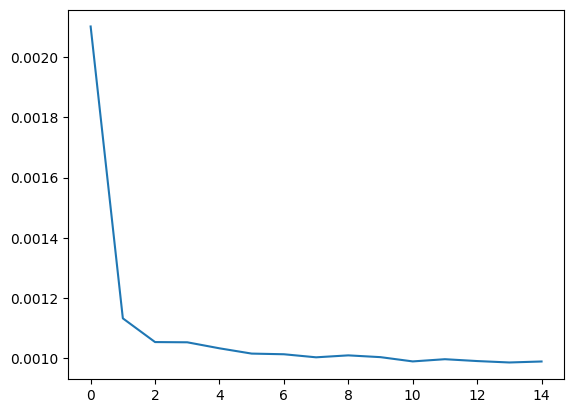

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot( range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-n_input:]

In [ ]:
last_train_batch = last_train_batch.reshape(1, n_input, n_features)

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 201ms/step


array([[0.6191513]], dtype=float32)

In [ ]:
scaled_train[0]

array([0.63805868])

In [ ]:
import numpy as np
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape(1,n_input, n_features)
import itertools
oop = list(itertools.chain.from_iterable(list(current_batch)))
cb = scaler.inverse_transform(oop)
print("current batch prev",cb)

ndf = 90
f=[]

for i in range(ndf):
  # Get the prediction value for the first batch
  current_pred = model.predict(current_batch)[0]
  l=[]
  l.append(current_pred)
  cp =scaler.inverse_transform(l)
  ccp = list(cp[0])
  print(ccp)
  f.append(ccp)
  print("HI",cp)

  #append the prediction into array
  test_predictions.append(current_pred)

  #use the predictions to update the batch and remove the first value
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
  oop = list(itertools.chain.from_iterable(list(current_batch)))
  cb = scaler.inverse_transform(oop)
  print("current batch after",cb)

current batch prev [[32.59]
 [32.29]
 [32.4 ]
 [30.12]
 [33.22]
 [33.3 ]
 [30.3 ]
 [31.28]
 [32.4 ]
 [33.48]
 [33.37]
 [32.29]
 [33.44]
 [33.15]
 [34.37]
 [34.92]
 [33.83]
 [33.3 ]
 [33.69]
 [33.83]
 [35.63]
 [36.1 ]
 [32.44]
 [32.34]
 [31.71]
 [31.28]
 [31.93]
 [28.81]
 [29.76]
 [29.72]]
1/1 [==============================] - 0s 116ms/step
[29.770447700619698]
HI [[29.7704477]]
current batch after [[32.29     ]
 [32.4      ]
 [30.12     ]
 [33.22     ]
 [33.3      ]
 [30.3      ]
 [31.28     ]
 [32.4      ]
 [33.48     ]
 [33.37     ]
 [32.29     ]
 [33.44     ]
 [33.15     ]
 [34.37     ]
 [34.92     ]
 [33.83     ]
 [33.3      ]
 [33.69     ]
 [33.83     ]
 [35.63     ]
 [36.1      ]
 [32.44     ]
 [32.34     ]
 [31.71     ]
 [31.28     ]
 [31.93     ]
 [28.81     ]
 [29.76     ]
 [29.72     ]
 [29.7704477]]
1/1 [==============================] - 0s 40ms/step
[29.89322504758835]
HI [[29.89322505]]
current batch after [[32.4       ]
 [30.12      ]
 [33.22      ]
 [33.3       ]
 [30.3

In [ ]:
f

[[29.770447700619698],
 [29.89322504758835],
 [29.86665057003498],
 [29.821325054168703],
 [29.72451352596283],
 [29.621532806158065],
 [29.5710271692276],
 [29.51001129925251],
 [29.425718578100206],
 [29.328376647233963],
 [29.23809950590134],
 [29.16854937016964],
 [29.08339583158493],
 [29.000050879120828],
 [28.9032632625103],
 [28.80003473162651],
 [28.7163919711113],
 [28.64252253174782],
 [28.5602622961998],
 [28.474041430950166],
 [28.365626257658004],
 [28.25159838080406],
 [28.192669340968134],
 [28.135253252983095],
 [28.074037395119667],
 [28.00407424092293],
 [27.910251662135124],
 [27.84619467198849],
 [27.775840237140656],
 [27.690967116355896],
 [27.600529115200043],
 [27.50591745376587],
 [27.408197284936907],
 [27.30766206920147],
 [27.204557443857194],
 [27.09893340587616],
 [26.989731323719024],
 [26.876644694209098],
 [26.759871331453326],
 [26.639672089219093],
 [26.515803503990174],
 [26.387776474952698],
 [26.255586654543876],
 [26.119131875038146],
 [25.978440

In [ ]:
print(len(f))

90


In [ ]:
ff=[]
for _ in f:
  ff.append(_[0])
  # print(_[0])


print(ff)


[29.770447700619698, 29.89322504758835, 29.86665057003498, 29.821325054168703, 29.72451352596283, 29.621532806158065, 29.5710271692276, 29.51001129925251, 29.425718578100206, 29.328376647233963, 29.23809950590134, 29.16854937016964, 29.08339583158493, 29.000050879120828, 28.9032632625103, 28.80003473162651, 28.7163919711113, 28.64252253174782, 28.5602622961998, 28.474041430950166, 28.365626257658004, 28.25159838080406, 28.192669340968134, 28.135253252983095, 28.074037395119667, 28.00407424092293, 27.910251662135124, 27.84619467198849, 27.775840237140656, 27.690967116355896, 27.600529115200043, 27.50591745376587, 27.408197284936907, 27.30766206920147, 27.204557443857194, 27.09893340587616, 26.989731323719024, 26.876644694209098, 26.759871331453326, 26.639672089219093, 26.515803503990174, 26.387776474952698, 26.255586654543876, 26.119131875038146, 25.978440395593644, 25.833453524112702, 25.68372780919075, 25.528904576897624, 25.36891209244728, 25.20368622928858, 25.033317199349405, 24.85

In [ ]:
import datetime
import pandas as pd

# initializing date
test_date = datetime.datetime.strptime("08-8-2023", "%d-%m-%Y")

# initializing K
K = ndf     #ndf is here for same number of dates as of forecasted data

date_generated = pd.date_range(test_date, periods=K)


dd=list(date_generated.strftime("%d-%m-%Y"))
print(dd)

['08-08-2023', '09-08-2023', '10-08-2023', '11-08-2023', '12-08-2023', '13-08-2023', '14-08-2023', '15-08-2023', '16-08-2023', '17-08-2023', '18-08-2023', '19-08-2023', '20-08-2023', '21-08-2023', '22-08-2023', '23-08-2023', '24-08-2023', '25-08-2023', '26-08-2023', '27-08-2023', '28-08-2023', '29-08-2023', '30-08-2023', '31-08-2023', '01-09-2023', '02-09-2023', '03-09-2023', '04-09-2023', '05-09-2023', '06-09-2023', '07-09-2023', '08-09-2023', '09-09-2023', '10-09-2023', '11-09-2023', '12-09-2023', '13-09-2023', '14-09-2023', '15-09-2023', '16-09-2023', '17-09-2023', '18-09-2023', '19-09-2023', '20-09-2023', '21-09-2023', '22-09-2023', '23-09-2023', '24-09-2023', '25-09-2023', '26-09-2023', '27-09-2023', '28-09-2023', '29-09-2023', '30-09-2023', '01-10-2023', '02-10-2023', '03-10-2023', '04-10-2023', '05-10-2023', '06-10-2023', '07-10-2023', '08-10-2023', '09-10-2023', '10-10-2023', '11-10-2023', '12-10-2023', '13-10-2023', '14-10-2023', '15-10-2023', '16-10-2023', '17-10-2023', '18-1

In [ ]:
dff = pd.DataFrame(ff, index =dd,columns =['TEMPERATURE'])
# dff.set_index(dd, inplace=True)

In [ ]:
dff

,TEMPERATURE
08-08-2023,29.770448
09-08-2023,29.893225
10-08-2023,29.866651
11-08-2023,29.821325
12-08-2023,29.724514
...,...
01-11-2023,15.779894
02-11-2023,15.472480
03-11-2023,15.174159
04-11-2023,14.885935


In [ ]:
# plt.plot(dd, ff)
# plt.show()
# ff.plot()

In [ ]:
dff['TEMPERATURE']

08-08-2023    29.770448
09-08-2023    29.893225
10-08-2023    29.866651
11-08-2023    29.821325
12-08-2023    29.724514
                ...    
01-11-2023    15.779894
02-11-2023    15.472480
03-11-2023    15.174159
04-11-2023    14.885935
05-11-2023    14.608725
Name: TEMPERATURE, Length: 90, dtype: float64

In [ ]:
ind = list(dff.index.values.tolist())

In [ ]:
type(dff)

pandas.core.frame.DataFrame

<Axes: >

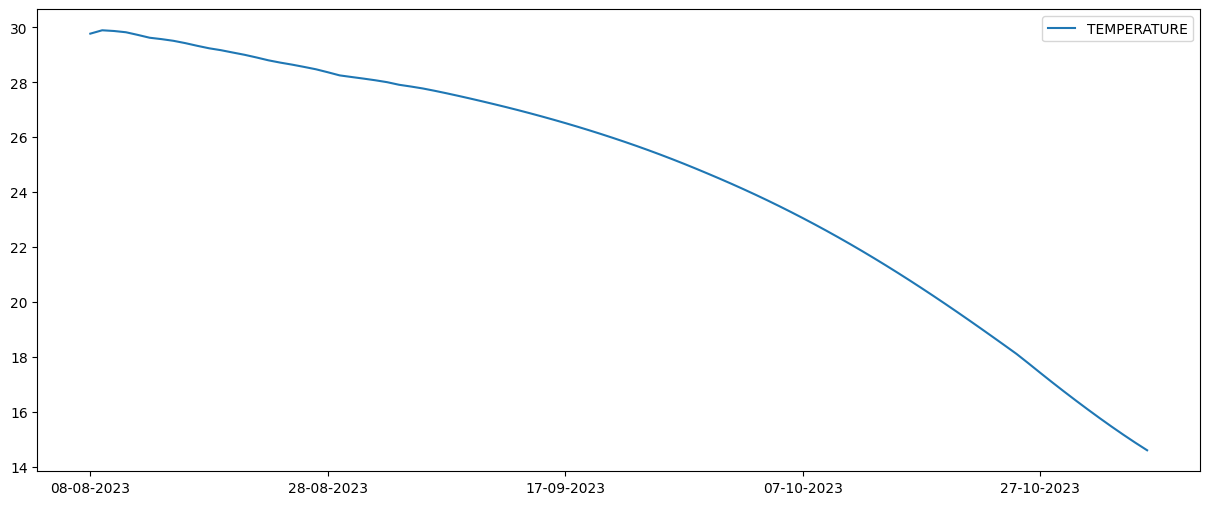

In [ ]:
dff.plot(figsize=(15,6))

In [ ]:
import plotly.graph_objects as go

import pandas as pd

# Load data
dff.columns = [col.replace("AAPL.", "") for col in dff.columns]

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=ind, y=list(dff.TEMPERATURE)))

# Set title
fig.update_layout(
    title_text="Time series with range slider and selectors"
)

# # Add range slider
# fig.update_layout(
#     xaxis=dict(
#         rangeselector=dict(
#             buttons=list([
#                 dict(count=1,
#                      label="1m",
#                      step="month",
#                      stepmode="backward"),
#                 dict(count=6,
#                      label="6m",
#                      step="month",
#                      stepmode="backward"),
#                 dict(count=1,
#                      label="YTD",
#                      step="year",
#                      stepmode="todate"),
#                 dict(count=1,
#                      label="1y",
#                      step="year",
#                      stepmode="backward"),
#                 dict(step="all")
#             ])
#         ),
#         rangeslider=dict(
#             visible=True
#         ),
#         type="date"
#     )
# )

# fig.show()

In [ ]:
# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()